### В данной домашней работе Вам предстоит отработать следующие 2 навыка: работа с пропущенными значениями и анализ выбросов.

In [142]:
import numpy as np
import pandas as pd

data = pd.read_csv('useful_tricks.csv', index_col='id')

In [91]:
data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,NaN,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,NaN,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Никудышный гном случайно пролил кофе на папку с данными и кодом. К несчастью, из-за этого они с братьями потеряли кучу информации в столбиках **passenger_count** и **distance_km**.

In [92]:
### Выведите количество пропусков в данных колонках
### На всякий случай, проверьте целостность данных в остальных
data.isnull().sum()
### Your code is here

vendor_id                  0
passenger_count       145864
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

Начнем с **passenger_count**. Вообще говоря, изначально это была категориальная колонка, к которой мы применили технику OneHotEncoder. Чтобы избавиться от пропусков в данных, конечно, можно просто убрать все объекты, в которых есть пропуски, но тогда мы потеряем ценную информацию. 

Воспользуйтесь относительно простым приемом из лекции: в указанной колонке заполните пропуски самым *популярным* значением среди неотсутствующих.

In [143]:
### Your code is here
data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)
### Выведите самое популярное значение с точностью до двух знаков после точки, округлив в большую сторону при необходимости. 
### В качестве десятичного разделителя используйте точку. 

/var/folders/89/khr26tw91bg6hcb2b8c13l5h0000gn/T/ipykernel_46844/3914119721.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['passenger_count'].fillna(data['passenger_count'].mode()[0], inplace=True)


In [77]:
data.isnull().sum()

vendor_id                  0
passenger_count            0
store_and_fwd_flag         0
distance_km           145864
log_trip_duration          0
anomaly                    0
traffic_jam                0
day_of_week_1              0
day_of_week_2              0
day_of_week_3              0
day_of_week_4              0
day_of_week_5              0
day_of_week_6              0
hour_1                     0
hour_2                     0
hour_3                     0
hour_4                     0
hour_5                     0
hour_6                     0
hour_7                     0
hour_8                     0
hour_9                     0
hour_10                    0
hour_11                    0
hour_12                    0
hour_13                    0
hour_14                    0
hour_15                    0
hour_16                    0
hour_17                    0
hour_18                    0
hour_19                    0
hour_20                    0
hour_21                    0
hour_22       

С колонкой **distance_km** поступим более интересным способом!

Чтобы заполнить пропуск в данной колонке для того или иного объекта, можно находить наиболее похожий на него объект и подглядывать в его значение **distance_km**. Для того, чтобы понять, насколько объекты похожи друг на друга, необходимо использовать Евклидово расстояние между этими самыми объектами в пространстве всех признаков!

С учетом количества объектов в нашем датасете и признаков, посчитать попарные расстояния будет мега-сложно. Поэтому давайте называть объекты похожими, если они принадлежат одной категории, составленной из следующих колонок:

1. vendor_id
2. store_and_fwd_flag
3. traffic_jam
4. month_2
5. month_3
6. month_4
7. month_5
8. month_6

Внутри каждой группы найдите среднее значение признака **distance_km** и заполните NaN'ы в объектах с пропуском в соответствии с тем, к какой категории относится данный объект. Похожее упражнение мы делали на практике в занятии!

**Hint**: достаточно просто взять group by по указанным выше категориальным колонкам и верно вставить полученный результат в исходную табличку.

P.S. Колонки выбраны случайным образом. Можно было взять и другую комбинацию.

In [144]:
# Выбираем колонки для группировки
group_cols = ['vendor_id', 'store_and_fwd_flag', 'traffic_jam', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6']

# Группируем данные по выбранным колонкам и считаем среднее значение distance_km внутри каждой группы
mean_distance = data.groupby(group_cols)['distance_km'].mean()

# Преобразуем индекс в колонки для удобства дальнейшей работы
mean_distance = mean_distance.reset_index()

# Создаем новую колонку в исходном датасете, которая будет содержать среднее значение distance_km для каждой группы
data = data.merge(mean_distance, on=group_cols, how='left', suffixes=('', '_mean'))

# Заполняем пропущенные значения в колонке distance_km средним значением для соответствующей группы
data['distance_km'] = data['distance_km'].fillna(data['distance_km_mean'])

# Удаляем ненужные колонки
data = data.drop(columns=['distance_km_mean'])


In [67]:
x = data.drop(columns=['log_trip_duration'])
y = data['log_trip_duration']

In [95]:
data.isnull().sum()

vendor_id             0
passenger_count       0
store_and_fwd_flag    0
distance_km           0
log_trip_duration     0
anomaly               0
traffic_jam           0
day_of_week_1         0
day_of_week_2         0
day_of_week_3         0
day_of_week_4         0
day_of_week_5         0
day_of_week_6         0
hour_1                0
hour_2                0
hour_3                0
hour_4                0
hour_5                0
hour_6                0
hour_7                0
hour_8                0
hour_9                0
hour_10               0
hour_11               0
hour_12               0
hour_13               0
hour_14               0
hour_15               0
hour_16               0
hour_17               0
hour_18               0
hour_19               0
hour_20               0
hour_21               0
hour_22               0
hour_23               0
month_2               0
month_3               0
month_4               0
month_5               0
month_6               0
dtype: int64

### Теперь наши данные чисты! Замерьте качество модели на Кросс-Валидации

In [145]:
# Вычисляем 0,5% и 99,5% квантили
q05 = data['log_trip_duration'].quantile(0.005)
q995 = data['log_trip_duration'].quantile(0.995)

# Удаляем выбросы из набора данных
data_no_outliers = data[(data['log_trip_duration'] >= q05) & (data['log_trip_duration'] <= q995)].dropna()



In [146]:
x = data_no_outliers.drop(columns=['log_trip_duration'])
y = data_no_outliers['log_trip_duration']

In [150]:
y.head()

0    6.122493
1    6.498282
2    7.661527
3    6.063785
4    6.077642
Name: log_trip_duration, dtype: float64

In [151]:
from sklearn.model_selection import KFold

selector = KFold(n_splits=4, shuffle=False)
msle = []
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
for index_train, index_test in selector.split(x):
    x_train, x_test = x.iloc[index_train], x.iloc[index_test]
    y_train, y_test = y.iloc[index_train], y.iloc[index_test]
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    msle.append(mean_squared_error(y_test, y_pred))


print(f"MSLE на Кросс-валидации: {round(sum(msle)/len(msle), 3)}")

MSLE на Кросс-валидации: 0.342


### Проведем анализ выбросов! Нарисуйте ящик с усами и гистограмму для таргетной переменной.

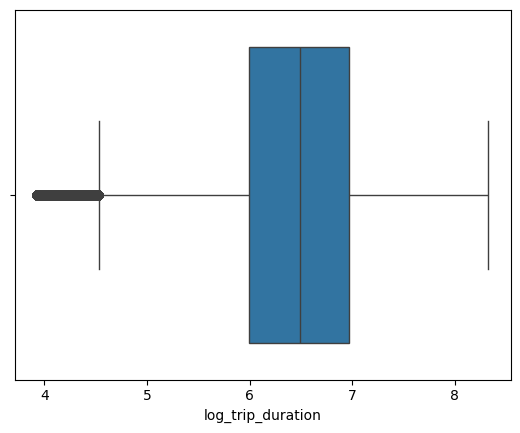

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем боксплот
sns.boxplot(x='log_trip_duration', data=data_no_outliers)


# Показываем графики
plt.show()

Есть ли, на ваш взгляд, в данных выбросы?

Кажется, что да!

Давайте почистим их, удалив те объекты, таргеты которых находятся вне промежутка

(топ 99,5% значение;   топ 0,5% значение)

In [ ]:
### Your code is here


Снова замерьте качество на кросс-валидации, используя старый selector

In [ ]:
### Your code is here
